In [1]:
import qiskit
import qiskit_ibm_runtime
print(f"Qiskit version: {qiskit.__version__}")
print(f"Runtime version: {qiskit_ibm_runtime.__version__}")

Qiskit version: 2.1.0
Runtime version: 0.40.1


## 2교시 : non_unitary 연산 및 OpenQasm

### 2-1 non-unitary 연산

양자 회로를 만드는 여러가지 방법을 포함해, 양자 회로를 사용해 다른 회로를 만들 수 있는 것, 알고 계신가요? 이번 코딩 실습에서 함께 확인해 봅시다. 관련 내용은 Qiskit API문서의 [Circuit Library](https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library)을 참고하며 진행해 봅시다.

#### 초기화
큐비트는 자동으로 $|0\rangle$으로 초기화되지만, 다른 여러가지 값으로도 초기화 시킬 수 있습니다. 한번 알아 봅시다.

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

1큐비트 양자회로를 선언한 후, initialize를 사용해 하다마드 게이트를 적용한 것과 같은 상태로 초기화 해보세요. initializes는 qc.initialize()의 형태로 사용합니다. 기타 Quantum Circuit과 관련된 명령어 들은 API 문서의 [Quantum circuit 섹션](https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit)을 살펴봅시다.

참고로 하다마드 게이트는 $|0\rangle$을 $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$로 만드는 연산자입니다.

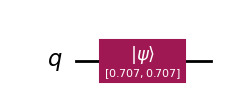

In [4]:
init_state = [1/np.sqrt(2),1/np.sqrt(2)]
qc = QuantumCircuit(1)
qc.initialize(init_state, 0)
qc.draw('mpl')

다음은 2큐비트 fully entangled된 양자회로를 만든 후 두 큐비트를 모두 $|0\rangle$로 초기화 해봅시다. 초기화는 qc.reset(qubit_index)의 형태로 사용합니다.

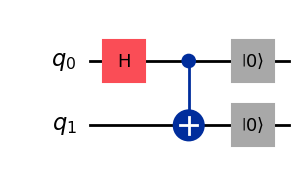

In [5]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
# 0,1번 큐비트를 초기화 해보세요.
qc.reset([0,1])

qc.draw('mpl')


#### 측정
시험문제에서 많은 분들이 실수를 하거나 방심해서 틀리는 구간입니다. 측정은 다음의 두가지 방법으로 사용합니다.
- `QuantumCircuit.measure(qubit, cbit)`
- `QuantumCircuit.measure_all`

각각의 방법으로 회로를 구현하고 그려본 후 잘 기억해 주세요.

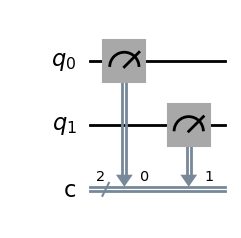

In [6]:
# 두개의 큐비트와 두개의 고전 비트를 지닌 양자 회로를 작성합니다. 0번 큐비트를 0번 고전비트로, 1번 큐비트를 1번 고전 비트로 측정하도록 measure를 적용하고 회로를 그려봅니다.
qc_ex1 = QuantumCircuit(2,2)

qc_ex1.measure(0,0)
qc_ex1.measure(1,1)

qc_ex1.draw('mpl')

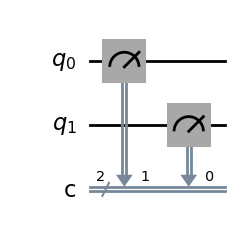

In [7]:
# 두개의 큐비트와 두개의 고전 비트를 지닌 양자 회로를 작성합니다. 0번 큐비트를 1번 고전비트로, 1번 큐비트를 0번 고전 비트로 측정하도록 measure를 적용하고 회로를 그려봅니다.
qc_ex1 = QuantumCircuit(2,2)

qc_ex1.measure(0,1)
qc_ex1.measure(1,0)

qc_ex1.draw('mpl')


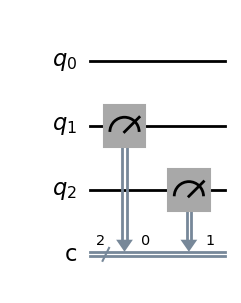

In [9]:
# 세 개의 큐비트와 두개의 고전 비트를 지닌 양자 회로를 작성합니다. 1번 큐비트를 1번 고전비트로, 2번 큐비트를 2번 고전 비트로 측정하도록 measure를 적용하고 회로를 그려봅니다.
qc_ex1 = QuantumCircuit(3,2)

qc_ex1.measure(1,0)
qc_ex1.measure(2,1)

qc_ex1.draw('mpl')


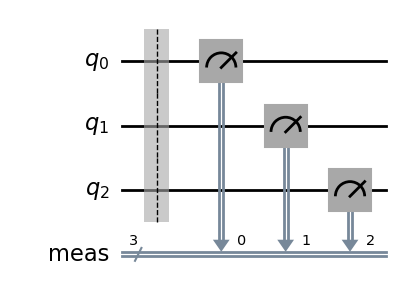

In [10]:
# 세 개의 큐비트를 지닌 양자회로를 작성합니다. mearuse_all()을 적용하고 회로를 그려봅니다.
qc_ex1 = QuantumCircuit(3)

qc_ex1.measure_all()

qc_ex1.draw('mpl')


### 2-2 회로의 조작

이번에는 두개의 회로를 합치는 여러가지 방법에 대해 실습해 봅시다. 우선 재료가 될 회로 두가지를 먼저 만들어 둡시다.

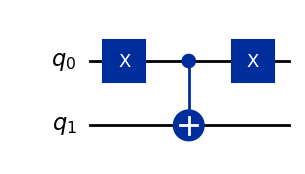

In [11]:
anti_cnot_qc = QuantumCircuit(2)
    
anti_cnot_qc.x(0)
anti_cnot_qc.cx(0,1)
anti_cnot_qc.x(0)
anti_cnot_qc.draw('mpl')

만들어둔 양자 회로를 다른 회로에 적용하기 위한 방법 중 하나는, 이 양자회로를 게이트로 변환하여 사용하는 것입니다. 위의 회로를 게이트로 다음의 셀을 실행해 변환해 봅시다.
`.to_gate()`를 사용해 anti_cnot_gate라는 이름의 게이트로 양자 회로를 변환해 봅시다.

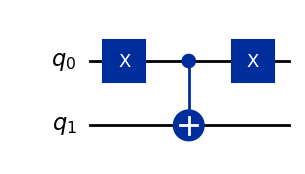

In [23]:
anti_cnot_gate = anti_cnot_qc.to_gate() #

anti_cnot_gate.definition.draw('mpl')

이제 만들어진 게이트를 새로운 양자 회로에 적용해 봅시다. 우선 적용할 대상이 될 회로를 만들어 둡시다.

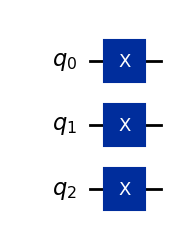

In [54]:
qc = QuantumCircuit(3)
qc.x([0,1,2])
qc.draw('mpl')

만들어진 양자회로의 끝부분에 게이트나, 양자회로를 붙일때는 `append()`함수를 사용합니다.
아래의 셀을 실행해서 결과를 확인해 봅시다.

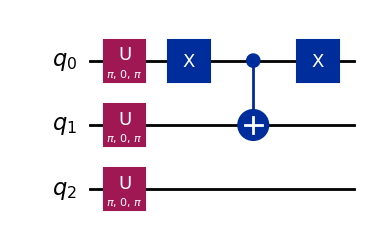

In [55]:
qc.append(anti_cnot_gate, [0,1])
qc.decompose().draw('mpl')

`append`를 사용해서 위에 만들어둔 양자 게이트를 qc의 각각 0번과 2번 큐비트에 적용해 봅시다.

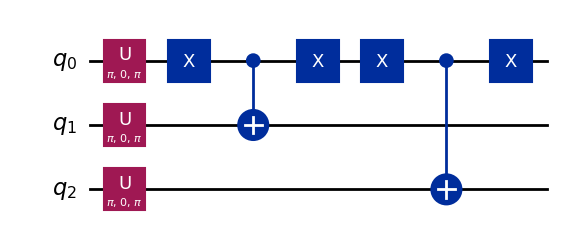

In [56]:
qc.append( anti_cnot_gate, [0,2] )#
qc.decompose().draw('mpl')

양자 회로를 합치는 명령어는 여러가지가 있으며 몇가지를 테스트 해봅시다. 우선 왼쪽에 위치할 회로를 만들어 둡시다.

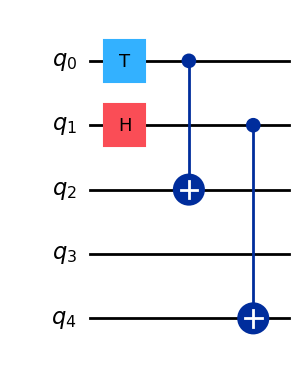

In [27]:
qc_l = QuantumCircuit(5)
qc_l.t(0)
qc_l.h(1)
qc_l.cx(0,2)
qc_l.cx(1,4)
qc_l.draw('mpl')

이제 오른쪽에 합쳐질 회로를 만들어 둡니다. 

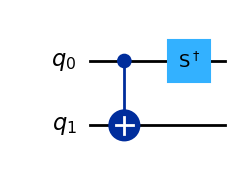

In [ ]:
qc_r = QuantumCircuit(2)
qc_r.cx(0,1)
qc_r.sdg(0)
qc_r.draw('mpl')

양자회로 원본을 손상시키지 않으면서 복사하기 위해서는 `.copy()` 명령어를 사용합니다.
`qc_l`을 복사하여 `new_qc` 라는 양자회로를 만듭니다. 이 양자 회로에 `.append()` 명령어를 사용해 각각 0, 1번 큐비트에 `qc_r`회로를 합친 후 그려봅니다.

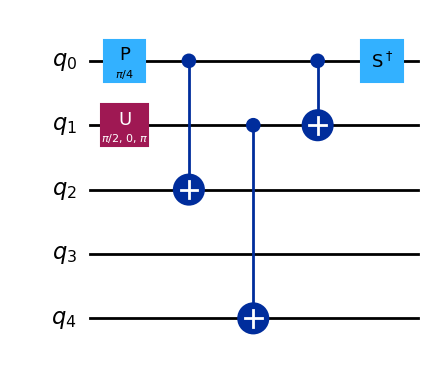

In [32]:
new_qc = qc_l.copy() #
new_qc.append( qc_r, [0,1] )# )
new_qc.decompose().draw('mpl')
# new_qc.draw('mpl')

두 양자회로를 합치는 데는 `compose()` 명령어를 사용할 수도 있습니다. `qc_l`과 `qc_r`을 `compose()` 명령어로 합쳐봅시다.

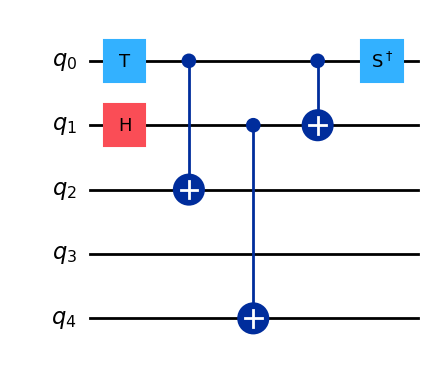

In [33]:
new_qc = qc_l.compose(qc_r) #
new_qc.draw('mpl')

이벤에는 `qc_r`을 qc_l의 1, 2번 큐비트에 위치시켜 봅시다. `compose()`명령어를 사용합니다.

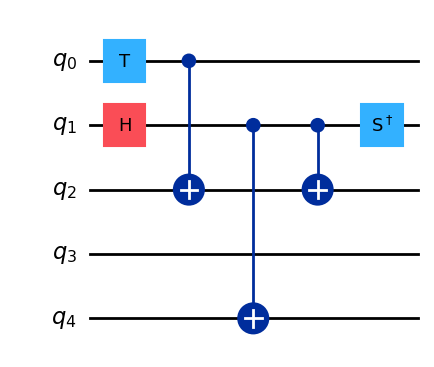

In [34]:
new_qc = qc_l.compose(qc_r, [1,2])#
new_qc.draw('mpl')

이제 아주 간단한 회로를 사용해서 회로를 반복하고, 양자 회로의 레이어를 반전시키는 것을 실습해 봅시다. 
아래에 2큐비트의 간단한 양자 회로를 만들어 봅시다. 각 큐비트에 x 게이트를 적용한 후, cx(0,1)게이트를 사용해 얽어줍시다.

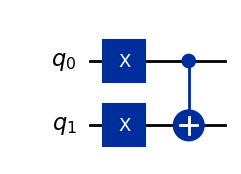

In [36]:
#
qc_ex2 = QuantumCircuit(2)

qc_ex2.x([0,1])

qc_ex2.cx(0,1)

qc_ex2.draw('mpl')


`repeat(iteration_number)` 명령어를 사용해 만든 양자회로를 2번 반복하여 new_qc에 저장하고 그려봅니다.

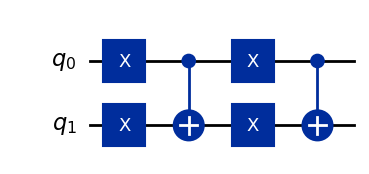

In [41]:
new_qc = qc_ex2.repeat(2)
# new_qc.draw('mpl')
new_qc.decompose().draw('mpl')

`inverse()` 명령어를 사용해서, qc의 `complex conjugate`회로를 만들어 출력해 봅시다.

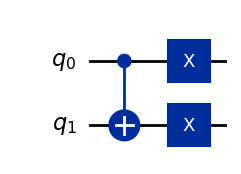

In [42]:
new_qc = qc_ex2.inverse()
new_qc.draw('mpl')

이미 작성한 양자회로에 큐비트나 고전 비트를 추가하여 크기를 늘리고 싶을때는 `add_register`를 사용합니다.

In [43]:
from qiskit import QuantumRegister, ClassicalRegister

In [49]:
q_bit = QuantumRegister(2)
c_bit = ClassicalRegister(2)

In [46]:
import numpy as np
from qiskit.circuit.library import SGate, SdgGate, TGate

S   = SGate().to_matrix()
Sdg = SdgGate().to_matrix()
T   = TGate().to_matrix()

print("S:\n", S)
print("S†:\n", Sdg)
print("T:\n", T)


S:
 [[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]
S†:
 [[ 1.+0.j  0.+0.j]
 [ 0.+0.j -0.-1.j]]
T:
 [[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]


위에서 만들어둔 양자 회로에 `add_register`를 사용해 `q_bit`을 추가해 봅시다.

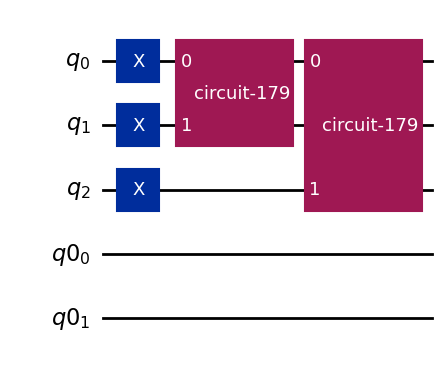

In [57]:

qc.add_register(q_bit)
qc.draw('mpl')

위에서 만들어둔 양자 회로에 `add_register`를 사용해 `c_bit`을 추가해 봅시다.

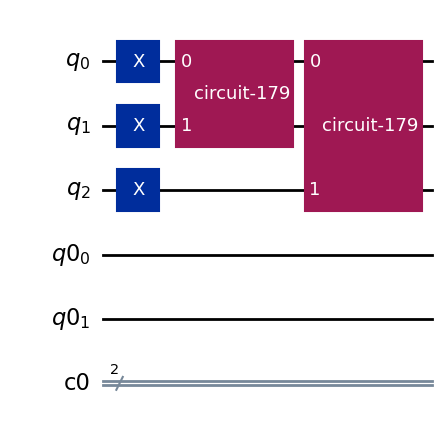

In [58]:

qc.add_register(c_bit)
qc.draw('mpl')

### 2-3 Parameterized Circuit
Qiskit은 회로를 작성할때 변수를 선언만 해두고 나중에 원하는 값을 배정하는  Parameterized Circuit을 지원합니다. 다음과 같이 사용합니다.

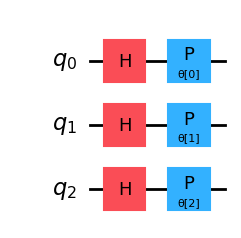

In [60]:
from qiskit.circuit import ParameterVector

theta = ParameterVector('θ', 3)

qc = QuantumCircuit(3)
qc.h([0,1,2])
qc.p(theta[0],0)
qc.p(theta[1],1)
qc.p(theta[2],2)

qc.draw('mpl')

도전 과제: 다음의 순서대로 양자 회로를 만들어 봅시다.

1. 다음 그림과 같은 1큐비트의 phase 게이트를 지닌 양자회로를 만들어 `to_gate()` 명령어를 사용해 `p16_gate`라는 이름으로 저장해 둡니다. 만든 후 `p16_gate.definition.draw()`를 사용해 그려봅니다.
   <img src="img/ex6.png">
2. 만들어둔 게이트에 `.control(2)` 명령어를 사용해서 제어 비트 두개를 추가로 붙입니다. 만든 후 `p16_gate.definition.draw()`를 사용해 그려봅니다.
3. 4큐비트 짜리 양자 회로를 선언하고 모든 큐비트에 하다마드 게이트를 적용합니다. 이 양자 회로에  `p16_gate`를 각각 큐비트 0, 1, 3에 적용한 후 양자 회로를 그려봅니다.


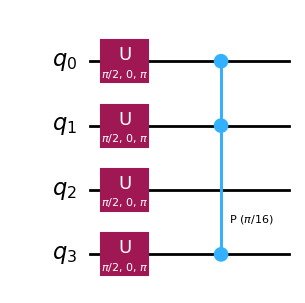

In [73]:
# your code
qc_ex3 = QuantumCircuit(1)
qc_ex3.p(np.pi/16,0)
p16_gate = qc_ex3.to_gate()

# p16_gate.definition.draw('mpl')

p16_gate = p16_gate.control(2)

p16_gate.definition.draw('mpl')

qc3 = QuantumCircuit(4)
qc3.h([0,1,2,3])

qc3.append(p16_gate,[0,1,3])

qc3.decompose().draw('mpl')

### 2-4 동적 회로

회로의 측정 결과에 따라 달라지는 동적인 회로를 만들 수 있을까요? 이 [가이드 문서](https://quantum.cloud.ibm.com/docs/en/guides/classical-feedforward-and-control-flow)를 참고하여 봅시다.

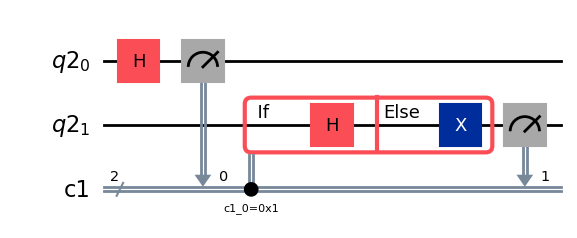

In [74]:
qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits

circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)

circuit.draw("mpl")

도전 과제 2: 지금까지 배운 개념들을 활용하여 양자 텔레포트 회로를 다시 만들어봅시다.

1. 임의의 `Statevector`를 정의하여 `initialize()` 명령어를 사용해 큐빗을 초기화해봅시다.
2. 양자 텔레포트 회로의 나머지 부분을 동적 회로를 이용하여 만듭니다.
   <img src="img/ex10.png">
3. 텔레포트가 완료된 큐비트에도 측정을 꼭 추가해주세요.
4. 완성된 회로를 시뮬레이터를 이용해 실행해봅시다.

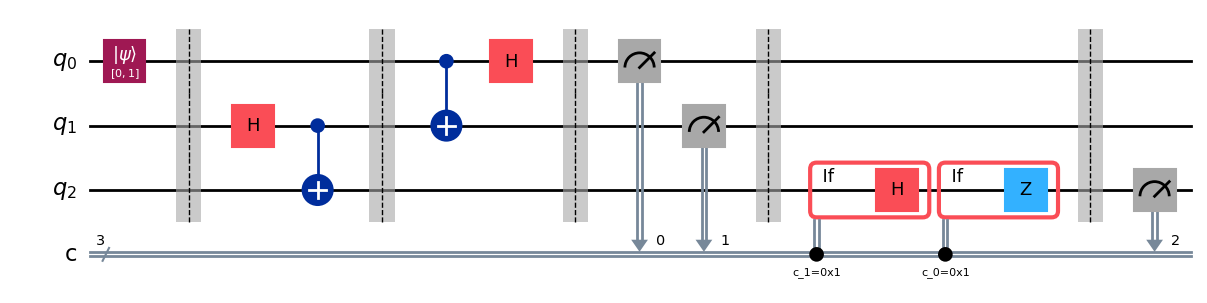

In [86]:
circuit = QuantumCircuit(3, 3)

# your code

init_state = [0,1]
circuit.initialize(init_state, 0)
circuit.barrier()

circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

circuit.cx(0,1)
circuit.h(0)
circuit.barrier()

circuit.measure(0,0)
circuit.measure(1,1)
circuit.barrier()

with circuit.if_test((1, 1)) as else_:
    circuit.h(2)

with circuit.if_test((0,1)):
    circuit.z(2)
circuit.barrier()

circuit.measure(2,2)

circuit.draw('mpl')


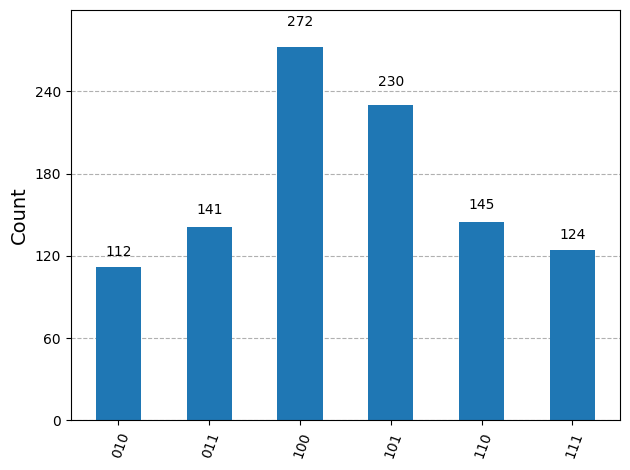

In [87]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram # plot_histogram을 불러옵니다.

backend = AerSimulator() # 시뮬레이터를 지정합니다.
sampler = Sampler(mode=backend) # Sampler 프리미티브로 회로를 실행합니다.
job = sampler.run([circuit]) # 회로가 [] 안에 들어가 있는 것을 잘 봐두세요.
count = job.result()[0].data.c.get_counts() # count를 가져오는 방법을 잘 기억해두세요.
plot_histogram(count)

### 2-5 OpenQasm 

OpenQasm이란 Open Quantum Assembly Language의 약자이며 양자 지시의 중간 표현 입니다. 어셈블리어 인만큼 Verilog와 비슷하게 더욱 하드웨어 친화적인 언어 입니다. Qiskit에서 만든 양자 회로를 qasm 모듈을 이용하여 더욱 하드웨어 친화적인 OpenQasm으로 바꿔줄 수 있습니다.

최신 버전의 OpenQasm3를 사용하기 위해서 qasm3 패키지를 설치해봅시다.

In [88]:
%pip install qiskit-qasm3-import

   ---------------------------------------- 0.0/541.5 kB ? eta -:--:--
   ---------------------------------------- 541.5/541.5 kB 5.5 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [openqasm3]
   ---------------------------------------- 0/3 [openqasm3]
   ---------------------------------------- 0/3 [openqasm3]
   ---------------------------------------- 0/3 [openqasm3]
   ---------------------------------------- 0/3 [openqasm3]
   ---------------------------------------- 0/3 [openqasm3]
   ---------------------------------------- 0/3 [openqasm3]
   ---------------------------------------- 0/3 [openqasm3]
   ---------------------------------------- 0/3 [openqasm3]
   ------------- -------------------------- 1/3 [antlr4_python3_runtime]
   ------------- -------------------------- 1/3 [antlr4_python3_runtime]
   ------------- -------------------------- 1/3 [antlr4_python3_runtime]
   ------------- -------------------------- 1/3 [antlr4_python3_runtime]
   -------------

QASM3 명령어는 다음과 같이 생겼습니다.

In [89]:
qasm_str = """
OPENQASM 3.0;
include "stdgates.inc";
bit[2] c;
qubit[2] q;
h q[0];
cx q[0], q[1];
c[0] = measure q[0];
c[1] = measure q[1];
"""

이 qasm 명령어로 양자 회로를 만들어 봅시다. 다음의 셀을 실행해 봅시다.

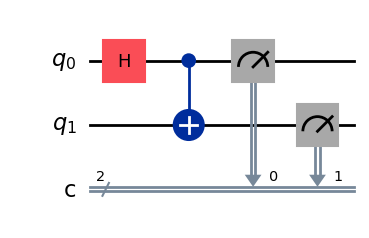

In [90]:
import qiskit.qasm3
new_qc = qiskit.qasm3.loads(qasm_str)
new_qc.draw('mpl')

반대로 양자 회로를 openqasm 명령어로 변환하고 저장할 수도 있습니다. new_qc를 다시 openqasm 명령어로 변환해 봅시다.

In [91]:
new_qasm = qiskit.qasm3.dumps(new_qc) # 양자 회로를 QASM 코드로 출력합니다.
print(new_qasm)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] c;
qubit[2] q;
h q[0];
cx q[0], q[1];
c[0] = measure q[0];
c[1] = measure q[1];



 양자 회로를 qasm으로 변환할때 파일로 바로 저장할 수도 있습니다. 다음의 셀을 실행해 봅시다.

In [92]:
f = open("sample.qasm", "w")
new_qasm = qiskit.qasm3.dump(new_qc, f) # 양자 회로를 QASM 코드로 sample.qasm 파일로 저장합니다.
f.close()

이번엔 저장된 qasm 파일을 불러들여서 양자 회로를 만든 후 출력해 봅시다.

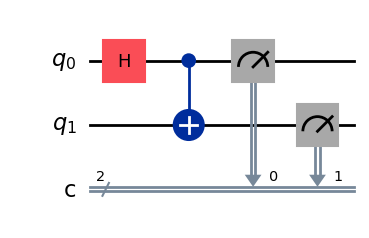

In [93]:
qc2 = qiskit.qasm3.load("./sample.qasm")
qc2.draw('mpl')